## Custom dataset

This notebook was made to custom the dataset, like putting some additional problem into this dataset

- *trying to turn it into the original form*

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from scipy import stats
import random

import warnings 

# Suppress all warnings
warnings.filterwarnings('ignore')

# Remove warning
warnings.simplefilter('ignore')


# Set option of DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 100)

# Set theme for plotting
sns.set_theme(style='darkgrid', palette='coolwarm', rc={'figure.figsize' :(15,10)})


### *Original Dataset*

In [36]:
alzheimer_df = pd.read_csv("alzheimer_disease_data_original.csv")
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [37]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [38]:
# 18 categorical features
categorical_features = ['Gender',
                     'Ethnicity',
                     'EducationLevel',
                     'Smoking',
                     'FamilyHistoryAlzheimers',
                     'CardiovascularDisease',
                     'Diabetes',
                     'Depression',
                     'HeadInjury',
                     'Hypertension',
                     'MemoryComplaints',
                     'BehavioralProblems',
                     'Confusion',
                     'Disorientation',
                     'PersonalityChanges',
                     'DifficultyCompletingTasks',
                     'Forgetfulness',
                     'Diagnosis']

# 15 numerical features
numerical_features = ['Age',     
                      'BMI',
                      'AlcoholConsumption',
                      'PhysicalActivity',
                      'DietQuality',
                      'SleepQuality',
                      'SystolicBP',
                      'DiastolicBP',
                      'CholesterolTotal',
                      'CholesterolLDL',
                      'CholesterolHDL',
                      'CholesterolTriglycerides',
                      'MMSE',
                      'FunctionalAssessment',
                      'ADL']

### *Labeling for categorical features*

In [39]:
alzheimer_df[categorical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,2149.0,0.506282,0.500077,0.0,0.0,1.0,1.0,1.0
Ethnicity,2149.0,0.697534,0.996128,0.0,0.0,0.0,1.0,3.0
EducationLevel,2149.0,1.286645,0.904527,0.0,1.0,1.0,2.0,3.0
Smoking,2149.0,0.288506,0.453173,0.0,0.0,0.0,1.0,1.0
FamilyHistoryAlzheimers,2149.0,0.252210,0.434382,0.0,0.0,0.0,1.0,1.0
CardiovascularDisease,2149.0,0.144253,0.351428,0.0,0.0,0.0,0.0,1.0
Diabetes,2149.0,0.150768,0.357906,0.0,0.0,0.0,0.0,1.0
Depression,2149.0,0.200558,0.400511,0.0,0.0,0.0,0.0,1.0
HeadInjury,2149.0,0.092601,0.289940,0.0,0.0,0.0,0.0,1.0
Hypertension,2149.0,0.148906,0.356079,0.0,0.0,0.0,0.0,1.0


In [40]:
alzheimer_df.replace({  "Gender":{ 0:"Male", 1:"Female" },                                                              
                        "Ethnicity":{ 0:"Caucasian", 1:"African American", 2:"Asian", 3:"Other" },                  # => ordinal encoder
                        "EducationLevel":{ 0:"None", 1:"High School", 2:"Bachelor's", 3:"Higher" },                 # => ordinal encoder
                        "Smoking":{ 0:"No", 1:"Yes" },
                        "FamilyHistoryAlzheimers": { 0:"No", 1:"Yes" },
                        "CardiovascularDisease":{ 0:"No", 1:"Yes" },
                        "Diabetes":{ 0:"No", 1:"Yes"},
                        "Depression":{0:"No", 1:"Yes"},
                        "HeadInjury":{0:"No", 1:"Yes"},
                        "Hypertension":{0:"No", 1:"Yes"},
                        "MemoryComplaints":{0:"No", 1:"Yes"},
                        "BehavioralProblems":{0:"No", 1:"Yes"},
                        "Confusion":{0:"No", 1:"Yes"},
                        "Disorientation":{0:"No", 1:"Yes"},
                        "PersonalityChanges":{0:"No", 1:"Yes"},
                        "DifficultyCompletingTasks":{0:"No", 1:"Yes"},
                        "Forgetfulness":{0:"No", 1:"Yes"},
                        "Diagnosis":{0:"No", 1:"Yes"}
                        }, inplace=True)

In [41]:
alzheimer_df[categorical_features]

,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,Male,Caucasian,Bachelor's,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No
1,Male,Caucasian,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
2,Male,Other,High School,No,Yes,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No
3,Female,Caucasian,High School,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No
4,Male,Caucasian,None,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,Male,Caucasian,High School,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes
2145,Male,Caucasian,Bachelor's,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes
2146,Male,Caucasian,High School,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
2147,Female,Other,High School,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes


### *Making Missing Value*

**Solution**

- *Imputed by mean, median, KMeanImputed,...*
- *Drop columns if the percent of missing value is high*

In [42]:
# -> Missing feature selection manually, 
# -> Criteria: Lowest correlation with Diagnosis

missing_feature = [
                   "SystolicBP",                    # -> low corr -> 0.7

                   "AlcoholConsumption",            # -> low corr -> imputer by mean -> low, ratio: 8-10% -> drop later when feature selection
                   "Age",                           # -> low corr
                   "DiastolicBP",                   # -> low corr                       
                   "PhysicalActivity",              # -> low corr                        
                   "CholesterolTotal",              # -> low corr
                   "DietQuality"                    # -> low corr           
                   ] + [
                                    "HeadInjury",                           # -> imputed by most_values   -> low amount of missing values #14-18%
                                    "Forgetfulness",                        # -> imputed by most_values
                                    "Disorientation",                       # -> imputed by most_value

                                    "Depression",                           # -> high amount of missing values : 30-36% => drop
                                    "Smoking",                              # -> drop
                                    "DifficultyCompletingTasks",            # -> drop

                                    "PersonalityChanges",                   # -> Kmeans Imputer     -> medium 20-25%
                                    "Gender",                               # -> Kmeans Imputer
                                    ]
alzheimer_df[missing_feature]

,SystolicBP,AlcoholConsumption,Age,DiastolicBP,PhysicalActivity,CholesterolTotal,DietQuality,HeadInjury,Forgetfulness,Disorientation,Depression,Smoking,DifficultyCompletingTasks,PersonalityChanges,Gender
0,142,13.297218,73,72,6.327112,242.366840,1.347214,No,No,No,Yes,No,Yes,No,Male
1,115,4.542524,89,64,7.619885,231.162595,0.518767,No,Yes,No,No,No,No,No,Male
2,99,19.555085,73,116,7.844988,284.181858,1.826335,No,No,Yes,No,No,Yes,No,Male
3,118,12.209266,74,115,8.428001,159.582240,7.435604,No,No,No,No,Yes,No,No,Female
4,94,18.454356,89,117,6.310461,237.602184,0.795498,No,No,No,No,No,Yes,Yes,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,122,1.561126,61,101,4.049964,280.476824,6.555306,No,No,No,No,No,No,No,Male
2145,152,18.767261,75,106,1.360667,186.384436,2.904662,No,No,No,No,No,No,No,Male
2146,115,4.594670,77,118,9.886002,237.024558,8.120025,No,No,No,No,No,No,No,Male
2147,103,8.674505,78,96,6.354282,242.197192,1.263427,No,Yes,No,No,No,No,No,Female


In [43]:
def remove_element_randomly(df: pd.DataFrame, features_ratios:dict[str:float]) -> pd.DataFrame:
    
    for feature, ratio in features_ratios.items():                                     # -> Loop through all features will be remove some random values

        no_values = int(df.shape[0] * ratio)                                           # -> Calculated number of values would be randomly removed 

        df.loc[random.sample(range(2149), no_values), feature] = np.NAN                # -> located random indexes of that feature using .loc method and assign NaN for those indexes.

    return df

alzheimer_df = remove_element_randomly(alzheimer_df, features_ratios={  "SystolicBP":0.073,    
                                                                        "AlcoholConsumption":0.082,      

                                                                            "Age":0.132,                           
                                                                            "DiastolicBP":0.172,                   
                                                                            "PhysicalActivity":0.082,              
                                                                            "CholesterolTotal":0.096,              
                                                                            "DietQuality":0.082,   

                                                                                "HeadInjury":0.142,                  
                                                                                "Forgetfulness":0.176,                        
                                                                                "Disorientation":0.154,             

                                                                                    "Depression":0.324,           
                                                                                    "Smoking":0.298,                              
                                                                                    "DifficultyCompletingTasks":0.309,      

                                                                                        "PersonalityChanges":0.254,                   
                                                                                        "Gender":0.248
})

alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73.0,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,NaN,No,No,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,NaN,NaN,Yes,No,No,XXXConfid
1,4752,89.0,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,NaN,No,No,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,NaN,NaN,No,XXXConfid
2,4753,73.0,NaN,Other,High School,17.795882,NaN,19.555085,7.844988,1.826335,9.673574,Yes,No,No,NaN,No,No,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,NaN,No,No,XXXConfid
3,4754,74.0,Female,Caucasian,High School,33.800817,NaN,12.209266,8.428001,7.435604,8.392554,No,No,No,NaN,No,No,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,NaN,No,NaN,No,No,XXXConfid
4,4755,NaN,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61.0,Male,Caucasian,High School,39.121757,No,1.561126,4.049964,6.555306,7.535540,No,No,No,No,No,No,122.0,101.0,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,No,No,4.492838,Yes,No,No,NaN,No,Yes,XXXConfid
2145,6896,75.0,NaN,Caucasian,Bachelor's,17.857903,No,18.767261,1.360667,2.904662,8.555256,No,No,No,No,No,No,152.0,NaN,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,No,Yes,9.204952,No,No,No,No,No,Yes,XXXConfid
2146,6897,77.0,NaN,Caucasian,High School,15.476479,No,4.594670,9.886002,8.120025,5.769464,No,No,No,No,No,No,115.0,118.0,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,No,No,5.036334,No,No,No,NaN,No,Yes,XXXConfid
2147,6898,78.0,NaN,Other,High School,15.299911,NaN,8.674505,6.354282,1.263427,8.322874,No,Yes,No,No,No,No,103.0,96.0,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,No,No,3.785399,No,No,NaN,No,Yes,Yes,XXXConfid


In [44]:
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        1866 non-null   float64
 2   Gender                     1617 non-null   object 
 3   Ethnicity                  2149 non-null   object 
 4   EducationLevel             2149 non-null   object 
 5   BMI                        2149 non-null   float64
 6   Smoking                    1509 non-null   object 
 7   AlcoholConsumption         1973 non-null   float64
 8   PhysicalActivity           1973 non-null   float64
 9   DietQuality                1973 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   object 
 12  CardiovascularDisease      2149 non-null   object 
 13  Diabetes                   2149 non-null   objec

### *Adding some noise & outlier value*

- *Remove noise*

**Interquartile range method**

- *Sort your data from low to high*
- *Identify the first quartile (Q1), the median, and the third quartile (Q3).*
- *Calculate your IQR = Q3 – Q1*
- *Calculate your upper fence = Q3 + (1.5 * IQR)*
- *Calculate your lower fence = Q1 – (1.5 * IQR)*
- *Use your fences to highlight any outliers, all values that fall outside your fences.*

Your outliers are any values greater than your upper fence or less than your lower fence.

*=> keep outlier at a low ratio*


In [45]:
alzheimer_df[numerical_features]

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
0,73.0,22.927749,13.297218,6.327112,1.347214,9.025679,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883
1,89.0,26.827681,4.542524,7.619885,0.518767,7.151293,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424
2,73.0,17.795882,19.555085,7.844988,1.826335,9.673574,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548
3,74.0,33.800817,12.209266,8.428001,7.435604,8.392554,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226
4,NaN,20.716974,18.454356,6.310461,0.795498,5.597238,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61.0,39.121757,1.561126,4.049964,6.555306,7.535540,122.0,101.0,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,4.492838
2145,75.0,17.857903,18.767261,1.360667,2.904662,8.555256,152.0,NaN,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,9.204952
2146,77.0,15.476479,4.594670,9.886002,8.120025,5.769464,115.0,118.0,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,5.036334
2147,78.0,15.299911,8.674505,6.354282,1.263427,8.322874,103.0,96.0,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,3.785399


*outlier ratio range  => This ratio define the outlier range where outlier should be in there. upper_fence --- outlier range --- limit(calculated by multiply this ratio with the length of dataset add plus it to its max)*

*outlier_amount_ratio = 0.5  # -> number of outlier should be sample in the outlier range, calculated by multiply this ratio to the length of dataset*

In [46]:
def make_outlier(df: pd.DataFrame, features:list[str], outlier_ratio_range:list[float], outlier_amount_ratio:list[float]) -> pd.DataFrame:
    
    for idx, feature in enumerate(features):                                                                 # -> Iterate all features was selected to add outlier

        q1 = df[feature].quantile(0.25)                                                                 # -> Calculated the low quartile
        q3 = df[feature].quantile(0.75)                                                                 # -> Calculated the high quartile

        inter_quartile_range = q3 - q1                                                                  # -> calculated  inter quartile
        upper_fence = q3 + (1.5 * inter_quartile_range)

        outlier_limit = upper_fence + outlier_ratio_range[idx] * len(df)                                     # -> calculated the limit range of outlier

        outlier_range = range(int(upper_fence), int(outlier_limit))                                     # -> define outlier range for later use

        outliers = random.sample(outlier_range, int(outlier_amount_ratio[idx] * len(outlier_range)))         # -> sample randomly outlier within pre-define outlier range above 

        df.loc[random.sample(range(2149), len(outliers)), feature] = outliers                           # located randomly indexes equal to the outliers would be injected
        
    return df


alzheimer_df = make_outlier(alzheimer_df,
                            features=random.sample(numerical_features, k=5),
                            outlier_ratio_range=[0.005, 0.006, 0.001, 0.09, 0.04],
                            outlier_amount_ratio=[0.1, 0.2, 0.15, 0.04, 0.02])

alzheimer_df[numerical_features]

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
0,73.0,22.927749,13.297218,6.327112,1.347214,9.025679,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883
1,89.0,26.827681,4.542524,7.619885,0.518767,7.151293,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424
2,73.0,17.795882,19.555085,7.844988,1.826335,9.673574,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548
3,74.0,33.800817,12.209266,8.428001,7.435604,8.392554,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226
4,NaN,20.716974,18.454356,6.310461,0.795498,5.597238,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61.0,39.121757,1.561126,4.049964,6.555306,7.535540,122.0,101.0,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,4.492838
2145,75.0,17.857903,18.767261,1.360667,2.904662,8.555256,152.0,NaN,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,9.204952
2146,77.0,15.476479,4.594670,9.886002,8.120025,5.769464,115.0,118.0,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,5.036334
2147,78.0,15.299911,8.674505,6.354282,1.263427,8.322874,103.0,96.0,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,3.785399


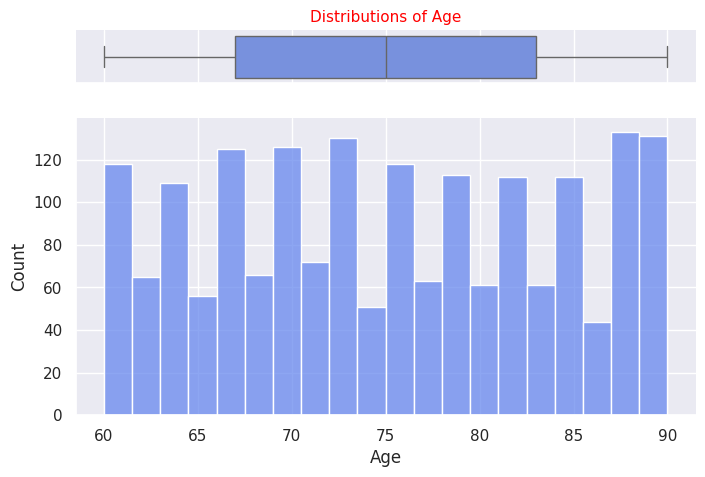

In [47]:

f, axes = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(8,5))

axes = axes.ravel()

axes[0].set_title(f'Distributions of Age',
                 fontsize=11, 
                 color='red')
https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data
sns.boxplot(alzheimer_df["Age"], ax=axes[0], orient='h')
sns.histplot(alzheimer_df["Age"], ax=axes[1], bins=20)

# axes[1].set(yticks=[])
sns.despine(ax=axes[1])
sns.despine(ax=axes[0], left=True)

### *Adding duplicated data*

**Solution**

- *remove duplicated records*

In [48]:
duplicated_record_ratio = 0.0945
alzheimer_df = pd.concat([alzheimer_df,
                          alzheimer_df.sample(int(duplicated_record_ratio * alzheimer_df.shape[0]))])

alzheimer_df.reset_index(inplace=True)
alzheimer_df


,index,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,0,4751,73.0,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,NaN,No,No,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,NaN,NaN,Yes,No,No,XXXConfid
1,1,4752,89.0,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,NaN,No,No,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,NaN,NaN,No,XXXConfid
2,2,4753,73.0,NaN,Other,High School,17.795882,NaN,19.555085,7.844988,1.826335,9.673574,Yes,No,No,NaN,No,No,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,NaN,No,No,XXXConfid
3,3,4754,74.0,Female,Caucasian,High School,33.800817,NaN,12.209266,8.428001,7.435604,8.392554,No,No,No,NaN,No,No,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,NaN,No,NaN,No,No,XXXConfid
4,4,4755,NaN,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,784,5535,62.0,Male,Asian,Bachelor's,37.204794,NaN,15.866661,0.834477,7.408433,8.910176,No,No,No,No,No,No,129.0,112.0,218.898884,61.511821,82.962286,146.182027,0.594672,7.616162,No,No,7.948689,No,No,NaN,NaN,No,No,XXXConfid
2348,1850,6601,83.0,Female,African American,None,25.730770,No,15.194961,1.019401,7.670402,6.623771,No,No,No,Yes,No,Yes,97.0,83.0,170.317799,83.735742,97.711721,163.500278,7.830375,2.403691,No,No,7.125541,No,No,NaN,No,No,No,XXXConfid
2349,777,5528,90.0,NaN,Asian,Bachelor's,15.387136,No,15.821380,NaN,2.240311,6.253344,No,No,No,No,No,No,97.0,61.0,NaN,68.865280,33.995829,60.951975,28.876218,3.136569,No,No,3.733343,No,No,No,NaN,No,No,XXXConfid
2350,2064,6815,74.0,Female,African American,None,38.916401,Yes,0.923593,9.658794,9.606757,8.309027,No,Yes,No,NaN,No,No,133.0,68.0,176.426489,163.637099,64.930858,280.277147,22.782386,1.280363,No,No,5.078113,Yes,Yes,Yes,No,Yes,Yes,XXXConfid


## *Save dataset*

- *We'll use this custom dataset for analysis and modeling*

In [58]:
alzheimer_df.to_csv("alzheimer_disease_data_custom.csv",index=False)
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73.0,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,NaN,No,No,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,NaN,NaN,Yes,No,No,XXXConfid
1,4752,89.0,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,NaN,No,No,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,NaN,NaN,No,XXXConfid
2,4753,73.0,NaN,Other,High School,17.795882,NaN,19.555085,7.844988,1.826335,9.673574,Yes,No,No,NaN,No,No,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,NaN,No,No,XXXConfid
3,4754,74.0,Female,Caucasian,High School,33.800817,NaN,12.209266,8.428001,7.435604,8.392554,No,No,No,NaN,No,No,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,NaN,No,NaN,No,No,XXXConfid
4,4755,NaN,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,5535,62.0,Male,Asian,Bachelor's,37.204794,NaN,15.866661,0.834477,7.408433,8.910176,No,No,No,No,No,No,129.0,112.0,218.898884,61.511821,82.962286,146.182027,0.594672,7.616162,No,No,7.948689,No,No,NaN,NaN,No,No,XXXConfid
2348,6601,83.0,Female,African American,None,25.730770,No,15.194961,1.019401,7.670402,6.623771,No,No,No,Yes,No,Yes,97.0,83.0,170.317799,83.735742,97.711721,163.500278,7.830375,2.403691,No,No,7.125541,No,No,NaN,No,No,No,XXXConfid
2349,5528,90.0,NaN,Asian,Bachelor's,15.387136,No,15.821380,NaN,2.240311,6.253344,No,No,No,No,No,No,97.0,61.0,NaN,68.865280,33.995829,60.951975,28.876218,3.136569,No,No,3.733343,No,No,No,NaN,No,No,XXXConfid
2350,6815,74.0,Female,African American,None,38.916401,Yes,0.923593,9.658794,9.606757,8.309027,No,Yes,No,NaN,No,No,133.0,68.0,176.426489,163.637099,64.930858,280.277147,22.782386,1.280363,No,No,5.078113,Yes,Yes,Yes,No,Yes,Yes,XXXConfid


### *Checking custom dataset*

In [59]:
alzheimer_df_custom = pd.read_csv('alzheimer_disease_data_custom.csv')
alzheimer_df_custom

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73.0,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,NaN,No,No,142.0,72.0,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,NaN,NaN,Yes,No,No,XXXConfid
1,4752,89.0,Male,Caucasian,NaN,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,NaN,No,No,115.0,NaN,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,NaN,NaN,No,XXXConfid
2,4753,73.0,NaN,Other,High School,17.795882,NaN,19.555085,7.844988,1.826335,9.673574,Yes,No,No,NaN,No,No,99.0,116.0,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,NaN,No,No,XXXConfid
3,4754,74.0,Female,Caucasian,High School,33.800817,NaN,12.209266,8.428001,7.435604,8.392554,No,No,No,NaN,No,No,118.0,115.0,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,NaN,No,NaN,No,No,XXXConfid
4,4755,NaN,Male,Caucasian,NaN,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94.0,117.0,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,5535,62.0,Male,Asian,Bachelor's,37.204794,NaN,15.866661,0.834477,7.408433,8.910176,No,No,No,No,No,No,129.0,112.0,218.898884,61.511821,82.962286,146.182027,0.594672,7.616162,No,No,7.948689,No,No,NaN,NaN,No,No,XXXConfid
2348,6601,83.0,Female,African American,NaN,25.730770,No,15.194961,1.019401,7.670402,6.623771,No,No,No,Yes,No,Yes,97.0,83.0,170.317799,83.735742,97.711721,163.500278,7.830375,2.403691,No,No,7.125541,No,No,NaN,No,No,No,XXXConfid
2349,5528,90.0,NaN,Asian,Bachelor's,15.387136,No,15.821380,NaN,2.240311,6.253344,No,No,No,No,No,No,97.0,61.0,NaN,68.865280,33.995829,60.951975,28.876218,3.136569,No,No,3.733343,No,No,No,NaN,No,No,XXXConfid
2350,6815,74.0,Female,African American,NaN,38.916401,Yes,0.923593,9.658794,9.606757,8.309027,No,Yes,No,NaN,No,No,133.0,68.0,176.426489,163.637099,64.930858,280.277147,22.782386,1.280363,No,No,5.078113,Yes,Yes,Yes,No,Yes,Yes,XXXConfid
